<a href="https://colab.research.google.com/github/May-Xiaoting-Zhou/CS-579_OSNA_Project/blob/main/Group_31_Organization_Of_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install census


37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d

In [ ]:
import requests
import pandas as pd

In [ ]:
# API Key
API_KEY = '37cf2563e369844f2bf2c1cb2b0bedfd8f232d5d'

In [ ]:
def get_district_name(year, state_code, district_number):
  # Base URL for year
  BASE_URL = f'https://api.census.gov/data/{year}/acs/acs5'

  # Define parameters for the API request
  params = {
      'get': ','.join([
          'NAME',                   # Name of the district
          'B01003_001E',            # Total population
          'B02001_002E',            # White alone (race)
          'B02001_003E',            # Black or African American alone (race)
          'B19013_001E',            # Median household income
          'B15003_022E',            # Bachelor's degree (Educational attainment)
          'B23025_005E',            # Unemployment (16 years and over)
          'B17001_002E',            # Below poverty level
          'B25077_001E',            # Median value of owner-occupied housing units
          'B11001_001E',            # Total number of households
          'B01002_001E',            # Median age
          'B03002_003E',            # White alone, not Hispanic or Latino
          'B03002_004E',            # Black or African American alone, not Hispanic or Latino
          'B03002_012E',            # Hispanic or Latino

          # Housing
          'B25001_001E',            # Total housing units
          'B25002_001E',            # Occupied housing units
          'B25002_003E',            # Vacant housing units
          'B25064_001E',            # Median gross rent
          'B25075_001E',            # Housing unit value categories (owner-occupied)

          # Employment
          'B23025_003E',            # Employed population (16 years and over)
          'B24011_001E',            # Occupation for civilian employed population (16 years and over)
          'B08013_001E',            # Mean travel time to work

          # Education
          'B14001_002E',            # School enrollment (3 years and over)
          'B15003_017E',            # High school graduate (25 years and over)
          'B15003_023E',            # Graduate or professional degree (25 years and over)

          # Health Insurance
          'B27001_001E',            # Health insurance coverage (civilian noninstitutionalized population)
          'B27010_001E',            # Health insurance coverage by employment status (18 to 64 years)

          # Disability
          'B18101_001E',            # Population with a disability (total population)
          'B18101_002E',            # Population with a disability (under 18 years)
          'B18101_009E',            # Population with a disability (18 to 64 years)
          'B18101_016E',            # Population with a disability (65 years and over)

          # Families and Households
          'B11002_001E',            # Family households
          'B11003_001E',            # Nonfamily households
          'B11012_001E',            # Number of households with children under 18
          'B11013_001E',            # Households with one or more people 65 years and over

          # Race and Ethnicity (Additional)
          'B02001_005E',            # Asian alone (race)
          'B02001_007E',            # American Indian and Alaska Native alone (race)
          'B02001_006E',            # Native Hawaiian and Other Pacific Islander alone (race)

          # Poverty (Additional)
          'B17010_001E',            # Families in poverty
          'B17020_002E',            # Poverty rate of children under 18

          # Commuting
          'B08301_001E',            # Means of transportation to work
          'B08126_001E',            # Number of workers who work from home

          # Age and Sex
          'B01001_002E',            # Total male population
          'B01001_026E',            # Total female population
          'B01001_003E',            # Population under 5 years
          'B01001_020E',            # Population 65 years and over
      ]),
      'for': f'congressional district:{district_number}',  # 26th Congressional District
      'in': f'state:{state_code}',  # Florida state code is 12
      'key': API_KEY
  }

  # Send the GET request to the Census API
  response = requests.get(BASE_URL, params=params)

  # Check if the request was successful
  if response.status_code == 200:
      # Parse the JSON response
      data = response.json()

      # Convert the data into a pandas DataFrame
      columns = data[0]  # First row contains the column headers
      rows = data[1:]    # Remaining rows contain the actual data
      df = pd.DataFrame(rows, columns=columns)

      # Dictionary mapping codes to meanings
      code_to_meaning = {
          'B01003_001E': 'Total population',
          'B02001_002E': 'Population by sex and age',
          'B02001_003E': 'Population by sex and age (specific age group)',
          'B19013_001E': 'Median household income',
          'B15003_022E': 'Population by race and Hispanic or Latino origin (specific group)',
          'B23025_005E': 'Median family income',
          'B17001_002E': 'Per capita income',
          'B25077_001E': 'Housing units',
          'B11001_001E': 'Households',
          'B01002_001E': 'Population by age and sex (specific age group)',
          'B03002_003E': 'Population by race and Hispanic or Latino origin (specific group)',
          'B03002_004E': 'Population by race and Hispanic or Latino origin (specific group)',
          'B03002_012E': 'Population by race and Hispanic or Latino origin (specific group)',
          'B25001_001E': 'Housing occupancy',
          'B25002_001E': 'Occupied housing units',
          'B25002_003E': 'Occupied housing units (specific type)',
          'B25064_001E': 'Median gross rent',
          'B25075_001E': 'Median selected monthly owner costs as a percentage of household income',
          'B23025_003E': 'Family income',
          'B24011_001E': 'Poverty status in the past 12 months',
          'B08013_001E': 'Median gross rent as a percentage of household income',
          'B14001_002E': 'Poverty status in the past 12 months (specific group)',
          'B15003_017E': 'Population by race and Hispanic or Latino origin (specific group)',
          'B15003_023E': 'Population by race and Hispanic or Latino origin (specific group)',
          'B27001_001E': 'Median earnings by place of work',
          'B27010_001E': 'Median earnings by place of residence',
          'B18101_001E': 'Total civilian labor force',
          'B18101_002E': 'Total civilian labor force (specific group)',
          'B18101_009E': 'Unemployment rate',
          'B18101_016E': 'Employment status by industry',
          'B11002_001E': 'Households by income',
          'B11003_001E': 'Households by income (specific group)',
          'B11012_001E': 'Households by income (specific group)',
          'B11013_001E': 'Households by income (specific group)',
          'B02001_005E': 'Population by sex and age (specific group)',
          'B02001_007E': 'Population by sex and age (specific group)',
          'B02001_006E': 'Population by sex and age (specific group)',
          'B17010_001E': 'Per capita income (specific group)',
          'B17020_002E': 'Per capita income (specific group)',
          'B08301_001E': 'Median earnings by place of work (specific group)',
          'B08126_001E': 'Median earnings by place of residence (specific group)',
          'B01001_002E': 'Population by age and sex (specific group)',
          'B01001_026E': 'Population by age and sex (specific group)',
          'B01001_003E': 'Population by age and sex (specific group)',
          'B01001_020E': 'Population by age and sex (specific group)'
      }

      # Rename columns using the dictionary
      df.rename(columns=code_to_meaning, inplace=True)

      return df

      # Save the data to a CSV file
      # df.to_csv('california_39th_congressional_district.csv', index=False)
  else:
      print(f"Error: {response.status_code}")


In [ ]:
state_code = '12'  # Florida state code is 12
# district_number = '26'  # 26th Congressional District
year = '2022'
df_fl = pd.DataFrame()
for district_number in range(1, 29):
  district_number = str(district_number).zfill(2)
  df = get_district_name(year, state_code, str(district_number))
  # Use pd.concat and reassign the result to df_fl
  df_fl = pd.concat([df_fl, df], ignore_index=True)
  # ignore_index=True prevents duplicate indices

df_fl['congressional district'] = df_fl['congressional district'].astype(int)
df_fl

,NAME,Total population,Population by sex and age,Population by sex and age (specific age group),Median household income,Population by race and Hispanic or Latino origin (specific group),Median family income,Per capita income,Housing units,Households,...,Per capita income (specific group),Per capita income (specific group),Median earnings by place of work (specific group),Median earnings by place of residence (specific group),Population by age and sex (specific group),Population by age and sex (specific group),Population by age and sex (specific group),Population by age and sex (specific group),state,congressional district
0,"Congressional District 1 (118th Congress), Flo...",772291,567937,101727,70864,103241,17641,87388,255000,300098,...,197317,87388,356992,356992,389450,382841,23318,8837,12,01
1,"Congressional District 2 (118th Congress), Flo...",775769,517312,180139,58839,92955,18338,123027,208800,302164,...,182938,123027,342592,342592,390495,385274,20032,8770,12,02
2,"Congressional District 3 (118th Congress), Flo...",769691,547102,124705,55236,82732,18882,122382,194800,295221,...,178890,122382,310878,310878,384285,385406,18820,8650,12,03
3,"Congressional District 4 (118th Congress), Flo...",775118,440351,240469,65494,89519,19740,112426,232800,294852,...,196043,112426,356256,356256,378057,397061,24394,8972,12,04
4,"Congressional District 5 (118th Congress), Flo...",770573,543342,94551,81914,151109,15309,71037,345900,302259,...,195470,71037,388469,388469,378300,392273,22548,8974,12,05
5,"Congressional District 6 (118th Congress), Flo...",779543,597813,88378,59202,87775,17342,104532,231100,322922,...,206795,104532,313003,313003,379509,400034,18361,11567,12,06
6,"Congressional District 7 (118th Congress), Flo...",771916,544917,75684,74497,129538,16849,75047,291600,307938,...,202855,75047,377845,377845,378541,393375,19243,9589,12,07
7,"Congressional District 8 (118th Congress), Flo...",773536,599714,73350,70417,117007,17858,79240,279400,313093,...,197357,79240,332660,332660,380170,393366,17278,11767,12,08
8,"Congressional District 9 (118th Congress), Flo...",754301,386563,80585,68237,107756,19235,91813,294200,244425,...,176049,91813,370425,370425,374960,379341,22782,5915,12,09
9,"Congressional District 10 (118th Congress), Fl...",785358,381008,208381,65846,118119,27173,121119,301700,275968,...,167707,121119,392811,392811,389760,395598,22250,6790,12,10


In [ ]:
df_fl.to_csv('/content/drive/MyDrive/CS579_Online Social Network Analysis/dataset/FL_2022_District_Data.csv', index=False)

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/CS579_Online Social Network Analysis/dataset/FL_All_District_2022_Data.csv')
df_all

,Representatives,No,Year,Republican,Democratic,Libertarian,No Party Affiliation,Write-in,Total,Turnout_Republican,Turnout_Democratic,Result
0,1st district,1,2022,197349,93467,0,0,0,290816,0.678604,0.321396,Republican
1,1st district,1,2018,106199,216189,0,0,0,322388,0.329414,0.670586,Democratic
2,1st district,1,2014,"165,086","54,976",0,"15,281",0,"235,343",0.701470,0.233599,Republican
3,1st district,1,2010,170821,0,0,41503,1202,213526,0.800001,0.000000,Republican
4,1st district,1,2006,"135,786","62,340",0,0,0,"198,126",0.685352,0.314648,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...
131,26th district,26,2018,119797,115678,0,0,0,235475,0.508746,0.491254,Republican
132,26th district,26,2014,"83,031","78,306",0,0,0,"161,337",0.514643,0.485357,Republican
133,27th district,27,2022,136038,101404,0,0,0,237442,0.572931,0.427069,Republican
134,27th district,27,2018,130743,115588,0,0,6255,252586,0.517618,0.457618,Republican


In [ ]:
df_all = df_all[df_all['Year'] == 2022]
df_all = df_all.rename(columns={'No': 'congressional district'})
df_all

,Representatives,congressional district,Year,Republican,Democratic,Libertarian,No Party Affiliation,Write-in,Total,Turnout_Republican,Turnout_Democratic,Result
0,1st district,1,2022,197349,93467,0,0,0,290816,0.678604,0.321396,Republican
6,2d district,2,2022,"180,236",121153,0,0,0,301389,0.598018,0.401982,Republican
11,3d district,3,2022,178101,"103,382",0,3410,0,284893,0.625150,0.362880,Republican
16,4th district,4,2022,165696,108402,0,0,5,274103,0.604503,0.395479,Republican
27,6th district,6,2022,"226,548",0,"74,207",0,0,300755,0.753264,0.000000,Republican
33,7th district,7,2022,"177,966",126079,0,0,10,216617,0.821570,0.582036,Republican
39,8th district,8,2022,222128,120080,0,0,10,342218,0.649083,0.350887,Republican
45,9th district,9,2022,93827,108541,0,0,0,202368,0.463645,0.536355,Democratic
51,10th district,10,2022,"78,844","117,955",0,"3,111",0,"199,910",0.394397,0.590041,Democratic
55,11th district,11,2022,205995,115647,0,4967,0,326609,0.630708,0.354084,Republican


In [ ]:
# prompt: df_all left join df_fl by congressional district
df_merged = pd.merge(df_all, df_fl, on='congressional district', how='left')
df_merged = df_merged.drop(columns=['Representatives'])
df_merged.head()

,congressional district,Year,Republican,Democratic,Libertarian,No Party Affiliation,Write-in,Total,Turnout_Republican,Turnout_Democratic,...,Population by sex and age (specific group),Per capita income (specific group),Per capita income (specific group),Median earnings by place of work (specific group),Median earnings by place of residence (specific group),Population by age and sex (specific group),Population by age and sex (specific group),Population by age and sex (specific group),Population by age and sex (specific group),state
0,1,2022,197349,93467,0,0,0,290816,0.678604,0.321396,...,1296,197317,87388,356992,356992,389450,382841,23318,8837,12
1,2,2022,"180,236",121153,0,0,0,301389,0.598018,0.401982,...,606,182938,123027,342592,342592,390495,385274,20032,8770,12
2,3,2022,178101,"103,382",0,3410,0,284893,0.625150,0.362880,...,230,178890,122382,310878,310878,384285,385406,18820,8650,12
3,4,2022,165696,108402,0,0,5,274103,0.604503,0.395479,...,335,196043,112426,356256,356256,378057,397061,24394,8972,12
4,6,2022,"226,548",0,"74,207",0,0,300755,0.753264,0.000000,...,739,206795,104532,313003,313003,379509,400034,18361,11567,12


In [ ]:

# Specify the column to move
column_to_move = 'state'

# Remove the column from its current position
column = df_merged.pop(column_to_move)

# Insert the column at the beginning
df_merged.insert(0, column_to_move, column)

# Display the updated DataFrame (optional)
df_merged.head()

# Save the updated dataframe (optional)
# df_merged.to_csv('/content/drive/MyDrive/CS579_Online Social Network Analysis/dataset/FL_All_District_2022_Data_Updated.csv', index=False)

,state,congressional district,Year,Republican,Democratic,Libertarian,No Party Affiliation,Write-in,Total,Turnout_Republican,...,Population by sex and age (specific group),Population by sex and age (specific group),Per capita income (specific group),Per capita income (specific group),Median earnings by place of work (specific group),Median earnings by place of residence (specific group),Population by age and sex (specific group),Population by age and sex (specific group),Population by age and sex (specific group),Population by age and sex (specific group)
0,12,1,2022,197349,93467,0,0,0,290816,0.678604,...,18773,1296,197317,87388,356992,356992,389450,382841,23318,8837
1,12,2,2022,"180,236",121153,0,0,0,301389,0.598018,...,15628,606,182938,123027,342592,342592,390495,385274,20032,8770
2,12,3,2022,178101,"103,382",0,3410,0,284893,0.625150,...,16734,230,178890,122382,310878,310878,384285,385406,18820,8650
3,12,4,2022,165696,108402,0,0,5,274103,0.604503,...,22638,335,196043,112426,356256,356256,378057,397061,24394,8972
4,12,6,2022,"226,548",0,"74,207",0,0,300755,0.753264,...,27705,739,206795,104532,313003,313003,379509,400034,18361,11567


In [ ]:
df_merged.columns

Index(['state', 'congressional district', 'Year', 'Republican', 'Democratic',
       'Libertarian', 'No Party Affiliation', 'Write-in', 'Total',
       'Turnout_Republican', 'Turnout_Democratic', 'Result', 'NAME',
       'Total population', 'Population by sex and age',
       'Population by sex and age (specific age group)',
       'Median household income',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Median family income', 'Per capita income', 'Housing units',
       'Households', 'Population by age and sex (specific age group)',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Housing occupancy', 'Occupied housing units',
       'Occupied housing units (specific type)', 'Median gross rent',
       'Median selected monthly owner costs as a percentage of househol

In [ ]:
# prompt: remove 'state', 'congressional district', 'Year' 'NAME' from df_merged

columns_to_drop = ['state', 'congressional district', 'Year', 'NAME']
df_merged = df_merged.drop(columns=columns_to_drop)
df_merged

,Republican,Democratic,Libertarian,No Party Affiliation,Write-in,Total,Turnout_Republican,Turnout_Democratic,Result,Total population,...,Population by sex and age (specific group),Population by sex and age (specific group),Per capita income (specific group),Per capita income (specific group),Median earnings by place of work (specific group),Median earnings by place of residence (specific group),Population by age and sex (specific group),Population by age and sex (specific group),Population by age and sex (specific group),Population by age and sex (specific group)
0,197349,93467,0,0,0,290816,0.678604,0.321396,Republican,772291,...,18773,1296,197317,87388,356992,356992,389450,382841,23318,8837
1,"180,236",121153,0,0,0,301389,0.598018,0.401982,Republican,775769,...,15628,606,182938,123027,342592,342592,390495,385274,20032,8770
2,178101,"103,382",0,3410,0,284893,0.625150,0.362880,Republican,769691,...,16734,230,178890,122382,310878,310878,384285,385406,18820,8650
3,165696,108402,0,0,5,274103,0.604503,0.395479,Republican,775118,...,22638,335,196043,112426,356256,356256,378057,397061,24394,8972
4,"226,548",0,"74,207",0,0,300755,0.753264,0.000000,Republican,779543,...,27705,739,206795,104532,313003,313003,379509,400034,18361,11567
5,"177,966",126079,0,0,10,216617,0.821570,0.582036,Republican,771916,...,51024,221,202855,75047,377845,377845,378541,393375,19243,9589
6,222128,120080,0,0,10,342218,0.649083,0.350887,Republican,773536,...,20072,515,197357,79240,332660,332660,380170,393366,17278,11767
7,93827,108541,0,0,0,202368,0.463645,0.536355,Democratic,754301,...,115137,875,176049,91813,370425,370425,374960,379341,22782,5915
8,"78,844","117,955",0,"3,111",0,"199,910",0.394397,0.590041,Democratic,785358,...,56010,859,167707,121119,392811,392811,389760,395598,22250,6790
9,205995,115647,0,4967,0,326609,0.630708,0.354084,Republican,776905,...,34919,104,208645,75656,321930,321930,378688,398217,18503,8854


In [ ]:
# prompt: remove 'Republican', 'Democratic', 'Libertarian', 'No Party Affiliation',
#        'Write-in', 'Total', 'Turnout_Republican', 'Turnout_Democratic' from df_merged

columns_to_remove = ['Republican', 'Democratic', 'Libertarian', 'No Party Affiliation', 'Write-in', 'Total', 'Turnout_Republican', 'Turnout_Democratic']
df_merged = df_merged.drop(columns=columns_to_remove, errors='ignore')

<ipython-input-98-7119338ab977>:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_merged[col] = pd.to_numeric(df_merged[col].str.replace(',', ''), errors='ignore')


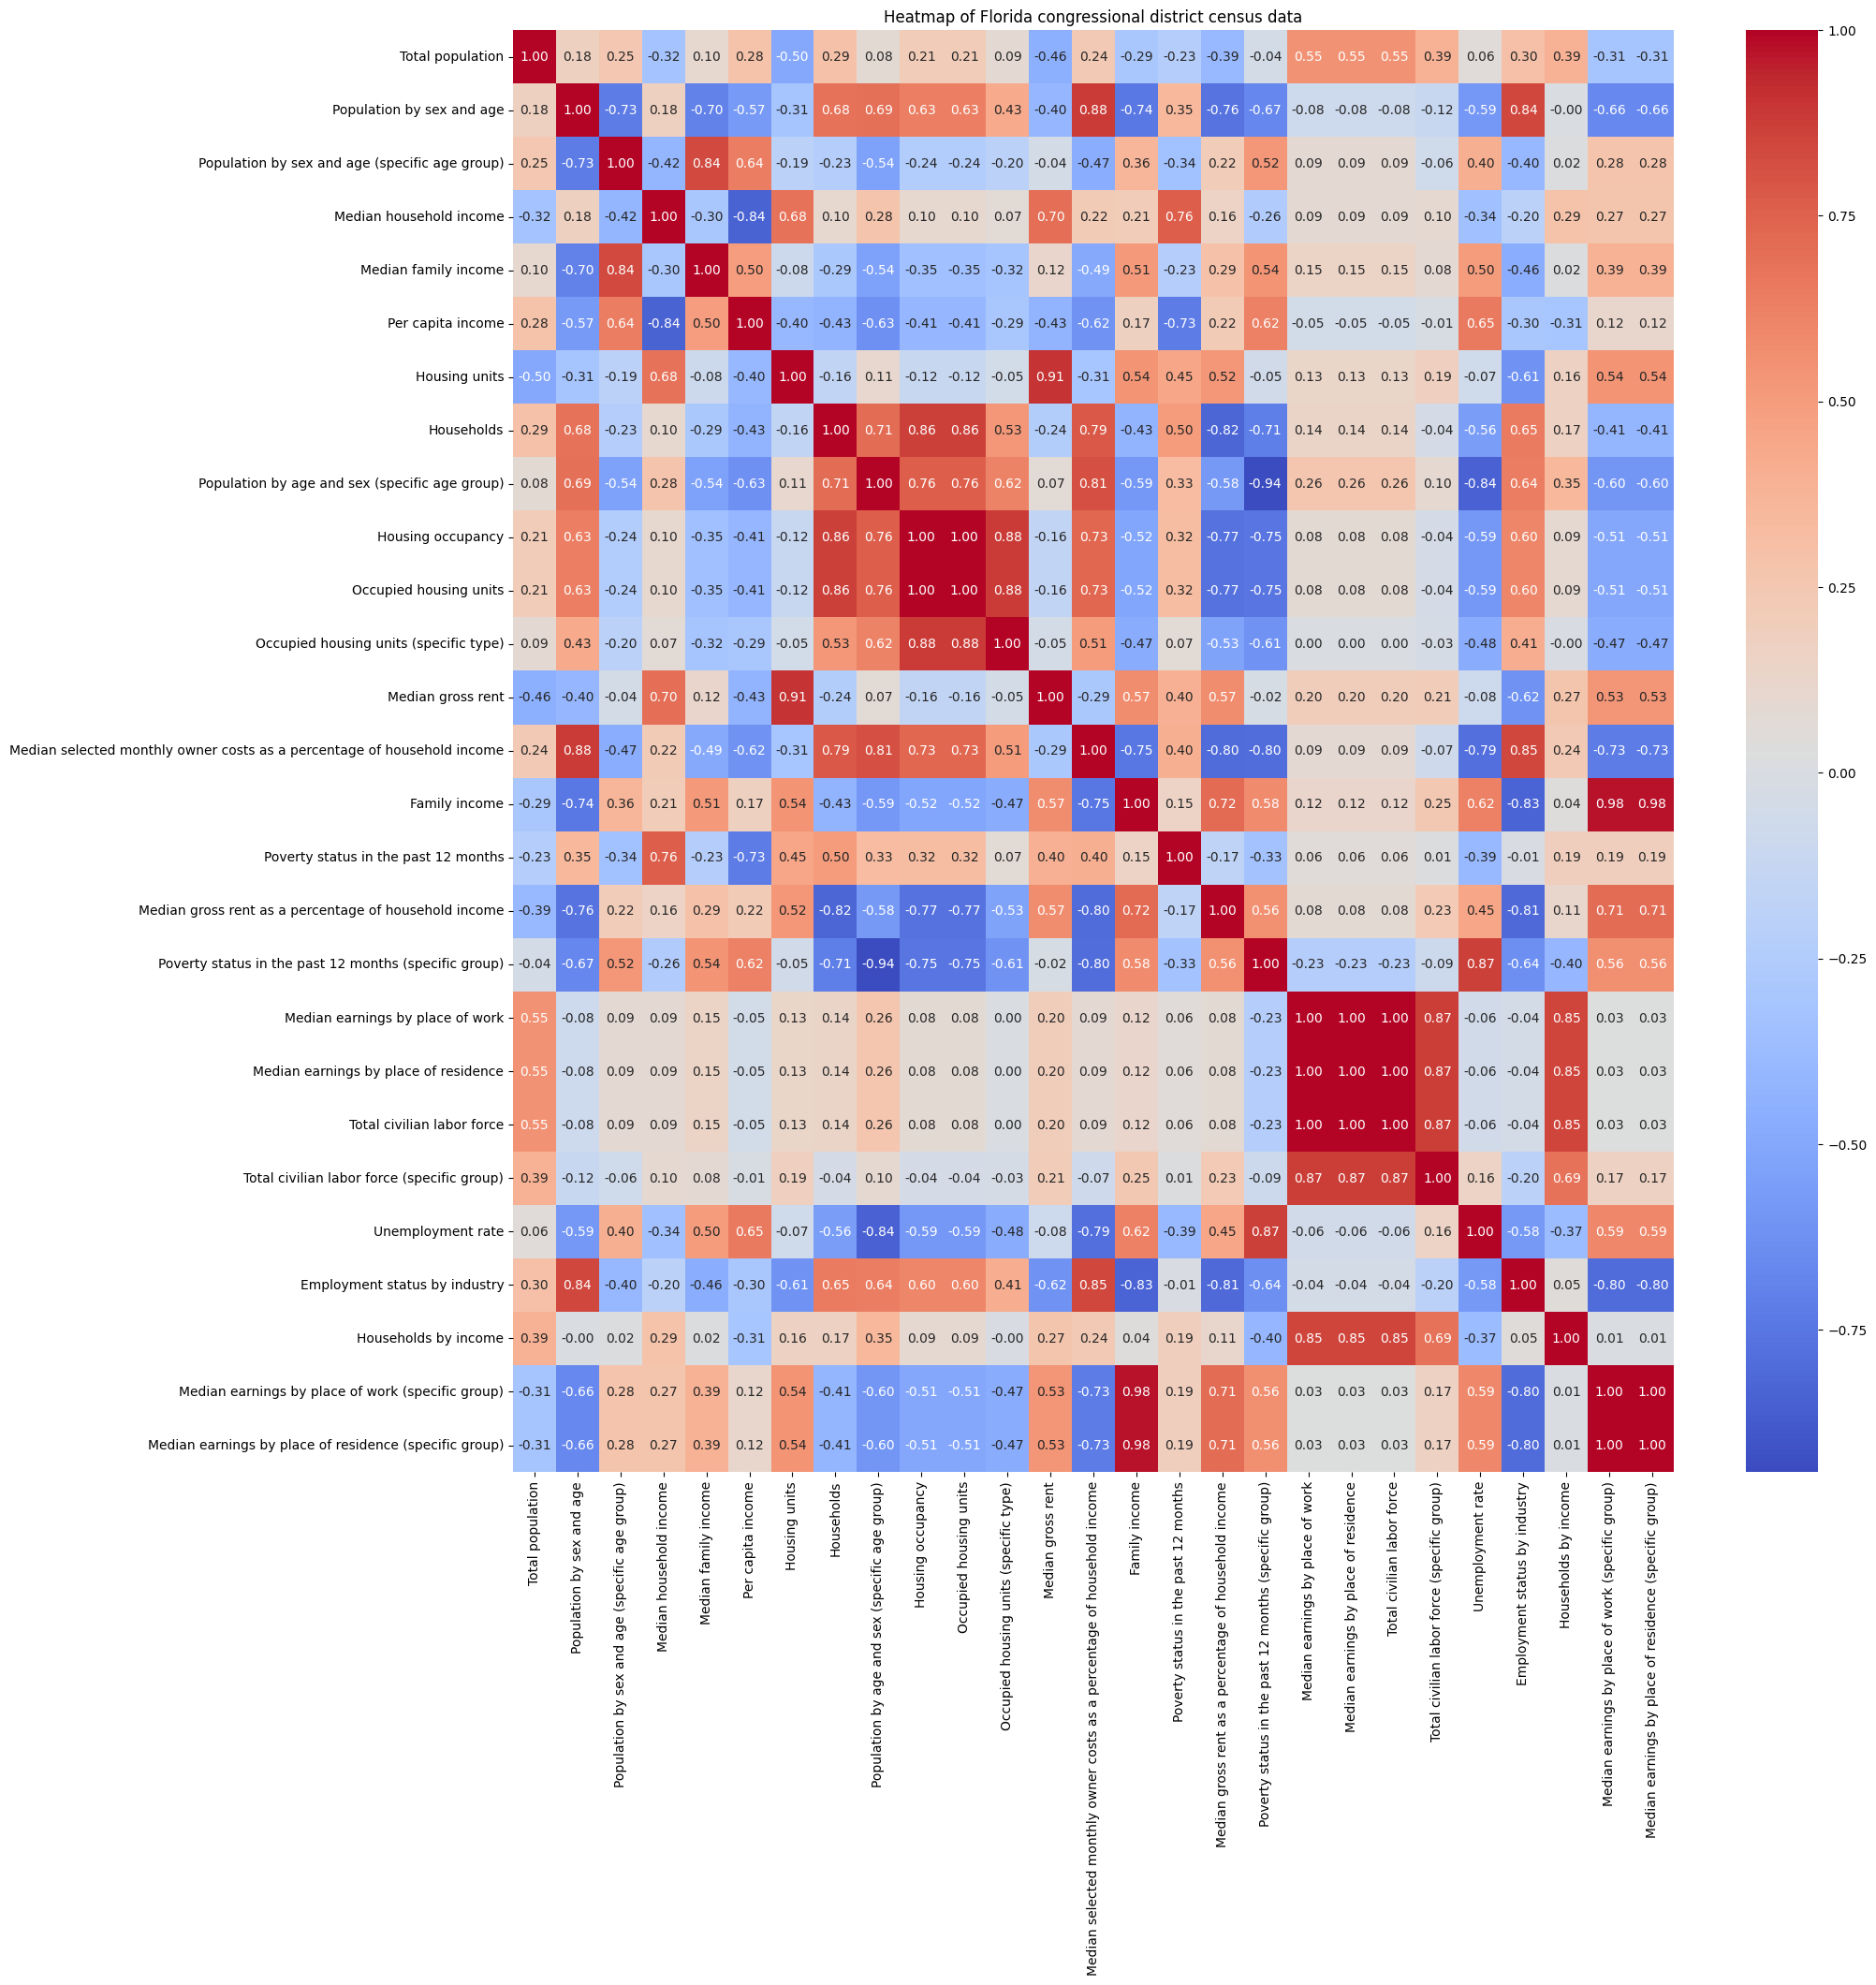

In [ ]:
# prompt: correlation heatmap for df_merged

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas for data manipulation

# Assuming df_merged contains columns with numbers formatted with commas
# Convert those columns to numeric
for col in df_merged.columns:
    try:
        # Attempt to convert the column to numeric, removing commas
        df_merged[col] = pd.to_numeric(df_merged[col].str.replace(',', ''), errors='ignore')
    except AttributeError:
        pass # Skip if column doesn't have str attribute (already numeric)


# Calculate the correlation matrix, only including numerical features
correlation_matrix = df_merged.select_dtypes(include=['number']).corr() # Select only numerical columns

# Create the heatmap
plt.figure(figsize=(20, 20))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Florida congressional district census data')
plt.show()

In [ ]:
df_merged.columns


Index(['Result', 'Total population', 'Population by sex and age',
       'Population by sex and age (specific age group)',
       'Median household income',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Median family income', 'Per capita income', 'Housing units',
       'Households', 'Population by age and sex (specific age group)',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Housing occupancy', 'Occupied housing units',
       'Occupied housing units (specific type)', 'Median gross rent',
       'Median selected monthly owner costs as a percentage of household income',
       'Family income', 'Poverty status in the past 12 months',
       'Median gross rent as a percentage of household income',
       'Poverty status in the past 12 months (specific group)',
 

<ipython-input-107-d15ef2e65414>:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent labels from overlapping


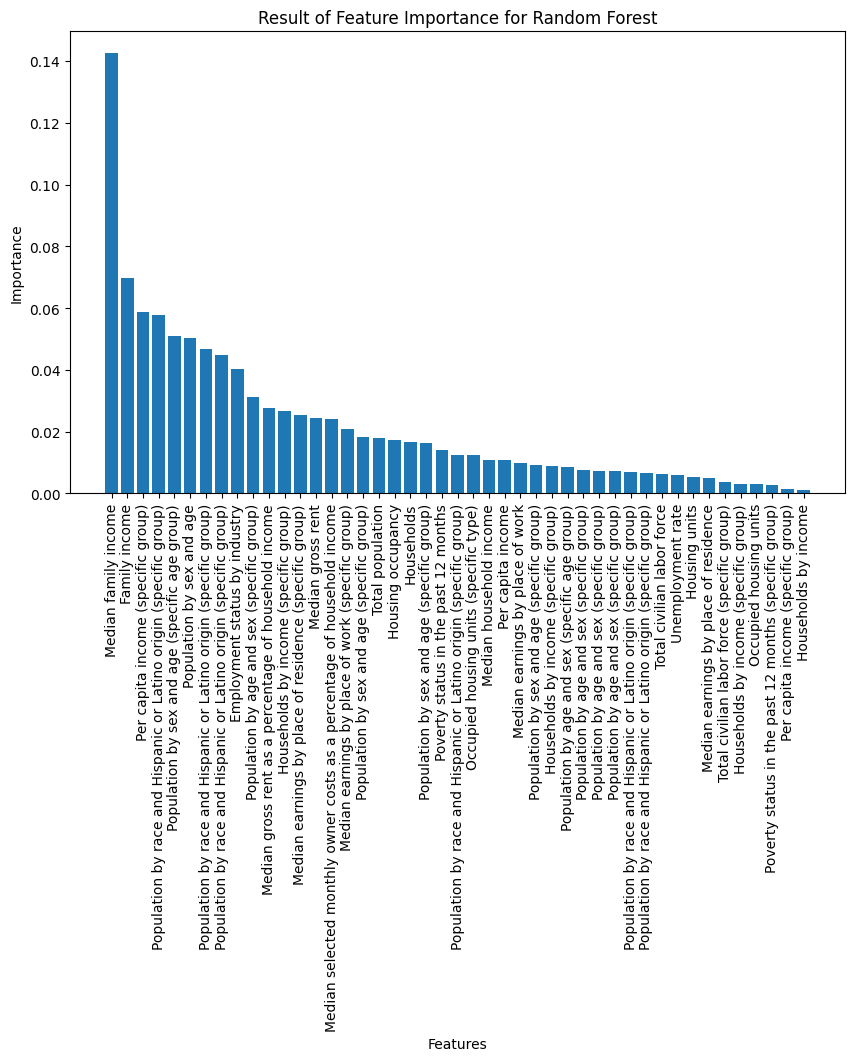

In [ ]:
# prompt: set 'Result' as label, plot feature importance by using random forest model for df_merged

from sklearn.ensemble import RandomForestClassifier # Changed to Classifier for categorical target
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Assuming 'Republican' is your target variable
X = df_merged.drop('Result', axis=1)  # Features
y = df_merged['Result']  # Target

# Initialize LabelEncoder and encode the target variable
le = LabelEncoder()
y = le.fit_transform(y) # Convert string labels to numerical labels

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Changed to Classifier
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.title("Result of Feature Importance for Random Forest")
plt.ylabel("Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel('Features')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
names

['Median family income',
 'Family income',
 'Per capita income (specific group)',
 'Population by race and Hispanic or Latino origin (specific group)',
 'Population by sex and age (specific age group)',
 'Population by sex and age',
 'Population by race and Hispanic or Latino origin (specific group)',
 'Population by race and Hispanic or Latino origin (specific group)',
 'Employment status by industry',
 'Population by age and sex (specific group)',
 'Median gross rent as a percentage of household income',
 'Households by income (specific group)',
 'Median earnings by place of residence (specific group)',
 'Median gross rent',
 'Median selected monthly owner costs as a percentage of household income',
 'Median earnings by place of work (specific group)',
 'Population by sex and age (specific group)',
 'Total population',
 'Housing occupancy',
 'Households',
 'Population by sex and age (specific group)',
 'Poverty status in the past 12 months',
 'Population by race and Hispanic or Latin

In [ ]:
# prompt: remove  'Housing units',
#  'Median earnings by place of residence',
#  'Total civilian labor force (specific group)',
#  'Households by income (specific group)',
#  'Occupied housing units',
#  'Poverty status in the past 12 months (specific group)',
#  'Per capita income (specific group)',
#  'Households by income' from df_merged

columns_to_remove = ['Housing units',
                     'Median earnings by place of residence',
                     'Total civilian labor force (specific group)',
                     'Households by income (specific group)',
                     'Occupied housing units',
                     'Poverty status in the past 12 months (specific group)',
                     'Per capita income (specific group)',
                     'Households by income']
df_merged = df_merged.drop(columns=columns_to_remove, errors='ignore')

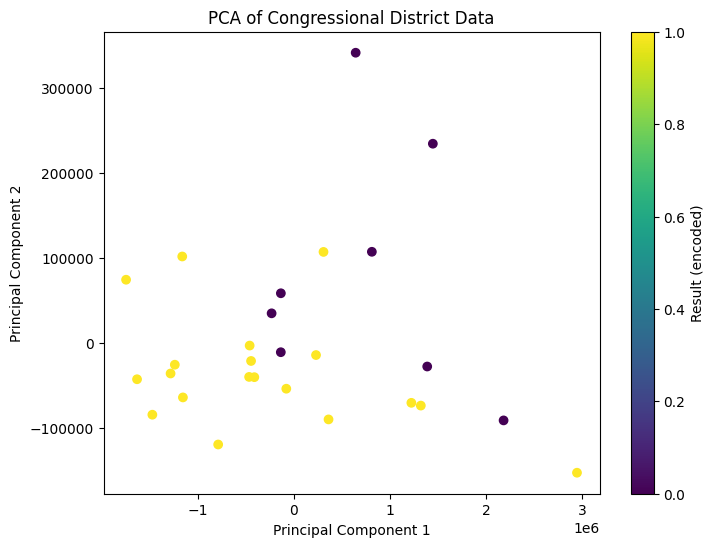

In [ ]:
# prompt: plot Principal Component Analysis (PCA) for df_merged['result']

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming df_merged and its 'result' column are already defined as in your provided code.

# If 'result' is categorical, you might need to encode it numerically first (like you did with LabelEncoder for the Random Forest)
# If it's already numerical, you can skip this step.

# Example using Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_merged['result_encoded'] = le.fit_transform(df_merged['Result'])

# Select features for PCA (exclude non-numerical columns and the target)
features = df_merged.select_dtypes(include=['number']).drop(columns=['result_encoded'], errors='ignore')

# Initialize PCA with the desired number of components
pca = PCA(n_components=2) # Example: reduce to 2 principal components

# Fit PCA to the features
pca.fit(features)

# Transform the features into the principal component space
principal_components = pca.transform(features)


# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])


# Add the encoded result back for plotting
principal_df['result'] = df_merged['Result']


# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['principal component 1'], principal_df['principal component 2'], c=df_merged['result_encoded'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Congressional District Data')
plt.colorbar(label='Result (encoded)') # This will show a colorbar representing the 'result' values
plt.show()

In [ ]:
df_merged.columns

Index(['Result', 'Total population', 'Population by sex and age',
       'Population by sex and age (specific age group)',
       'Median household income',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Median family income', 'Per capita income', 'Households',
       'Population by age and sex (specific age group)',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Housing occupancy', 'Occupied housing units (specific type)',
       'Median gross rent',
       'Median selected monthly owner costs as a percentage of household income',
       'Family income', 'Poverty status in the past 12 months',
       'Median gross rent as a percentage of household income',
       'Population by race and Hispanic or Latino origin (specific group)',
       'Population by race and H